In [1]:
from data.data_utils import get_data

In [2]:
data = get_data("data/norne-nb-in5550-train.conllu.gz")

In [45]:
len(data[0])

18098

In [46]:
lens = 0
i = len(data[0])
for s in data[0]:
    lens += len(s)

print(lens/i)

15.512984860205547


### Tokens

In [3]:
max_len = 0
max_idx = None

for i,s in enumerate(data[0]):
    if len(s) > max_len:
        max_len = len(s)
        max_idx = i

In [4]:
# longest sentence
max_len

91

In [5]:
lens = [len(s) for s in data[0]]

In [6]:
# unique lengths
len(set(lens))

72

In [7]:
# shortest sentence
min(lens)

1

In [8]:
import matplotlib.pyplot as plt

[]

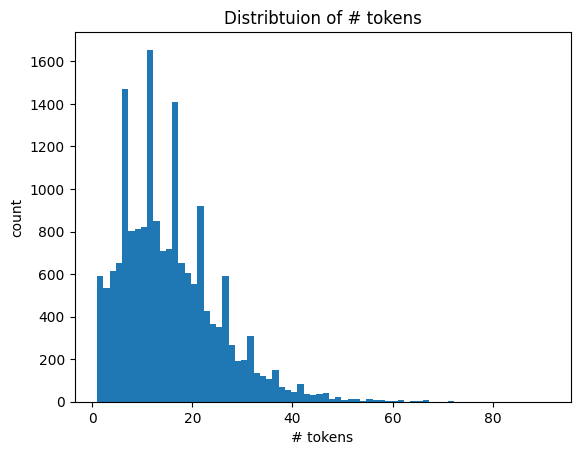

In [10]:
plt.title("Distribtuion of # tokens")
plt.xlabel("# tokens")
plt.ylabel("count")
n, bins, _ = plt.hist(lens, bins=72)
plt.plot()

### Encoded text

In [11]:
from transformers import AutoTokenizer

In [12]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def get_input_ids(txt):
    return tokenizer(
        txt, 
        padding=True,
        truncation=True,
        is_split_into_words=True,
        max_length=194
    )["input_ids"]

In [13]:
inp_ids = [get_input_ids(doc) for doc in data[0]]

In [49]:
ids_lens = 0
for s in inp_ids:
    ids_lens += len(s)

print(ids_lens/i)

36.66051497403028


In [14]:
# max length 
max([len(ids) for ids in inp_ids])

194

In [15]:
inp_ids_len = [len(ids) for ids in inp_ids]

In [16]:
len(set(inp_ids_len))

156

[]

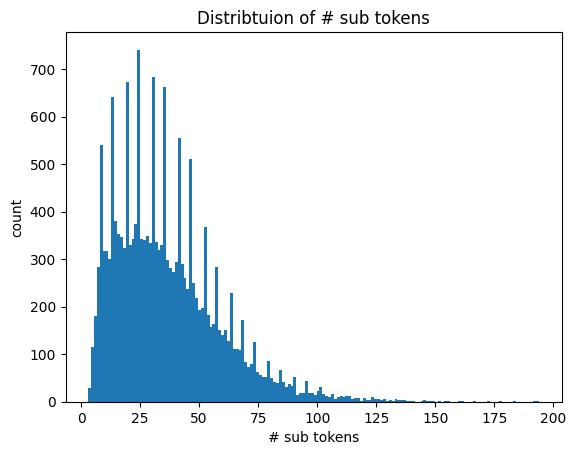

In [17]:
plt.title("Distribtuion of # sub tokens")
plt.xlabel("# sub tokens")
plt.ylabel("count")
n, bins, _ = plt.hist(inp_ids_len, bins=156)
plt.plot()

### Labels

In [18]:
unique_labels = []

for ls in data[1]:
    unique_labels.extend([l for l in ls if l not in unique_labels])
    
unique_labels_set = set(unique_labels)

In [19]:
unique_labels_set

{'B-DRV',
 'B-EVT',
 'B-GPE_LOC',
 'B-GPE_ORG',
 'B-LOC',
 'B-ORG',
 'B-PER',
 'B-PROD',
 'I-DRV',
 'I-EVT',
 'I-GPE_LOC',
 'I-GPE_ORG',
 'I-LOC',
 'I-ORG',
 'I-PER',
 'I-PROD',
 'O'}

In [85]:
len(unique_labels_set)

17

In [20]:
label_count = {k:0 for k in unique_labels_set}

In [21]:
for ls in data[1]:
    for c in ls:
        label_count[c] += 1
    

In [22]:
label_count

{'B-LOC': 755,
 'B-GPE_ORG': 450,
 'I-LOC': 279,
 'I-PROD': 707,
 'B-DRV': 596,
 'I-GPE_LOC': 230,
 'B-EVT': 136,
 'I-EVT': 67,
 'I-GPE_ORG': 24,
 'I-DRV': 149,
 'B-GPE_LOC': 2371,
 'I-PER': 2600,
 'B-PER': 4729,
 'O': 262604,
 'I-ORG': 1029,
 'B-PROD': 810,
 'B-ORG': 3218}

In [33]:
new_keys = [l[l.find("-")+1:] for l in label_count.keys()]

label_non_pos = {}
for k in new_keys:
    if k not in label_non_pos:
        label_non_pos[k] = label_count[f"B-{k}"]
        label_non_pos[k] += label_count[f"I-{k}"]

[]

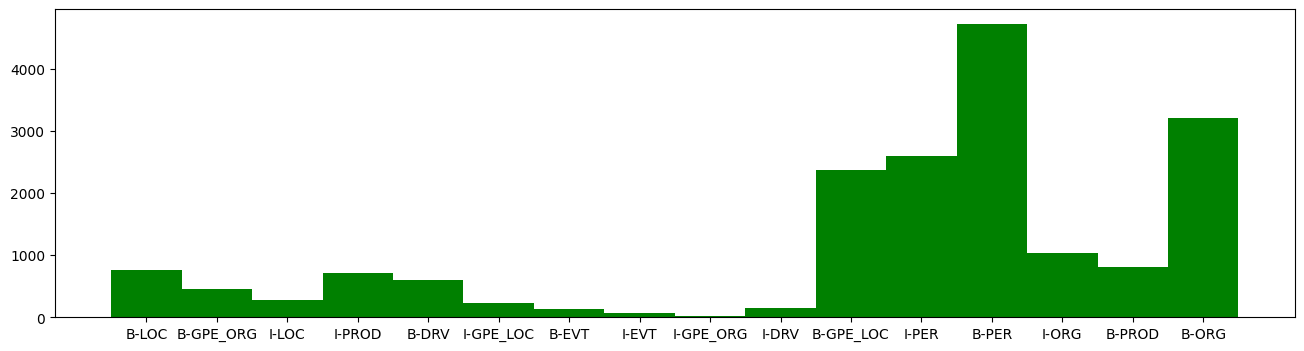

In [28]:
#del label_count["O"]
plt.figure(figsize=(16,4))
plt.bar(label_count.keys(), label_count.values(), 1.0, color='g')
plt.plot()

[]

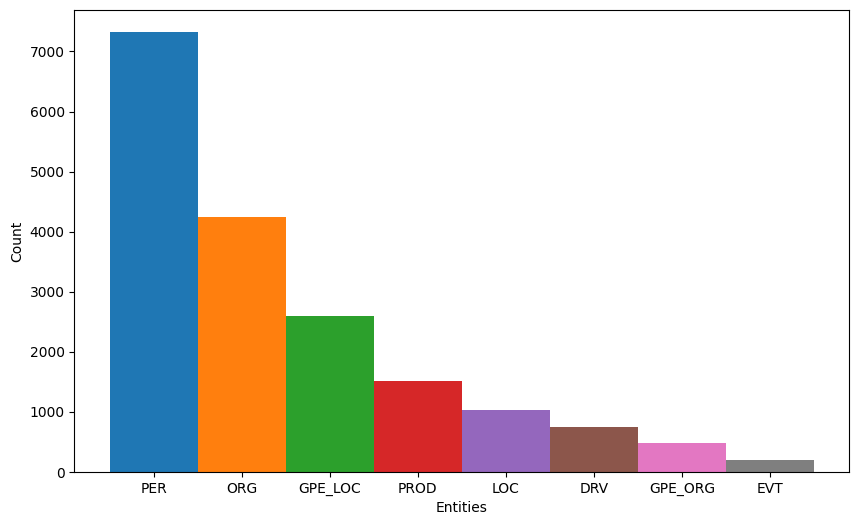

In [42]:
labels_sorted = [(k,v) for k,v in label_non_pos.items()]
labels_sorted.sort(key=lambda x: x[1], reverse=True)
plt.figure(figsize=(10,6))
for lc in labels_sorted:
    plt.bar(lc[0], lc[1], 1.0)#, color='g')

plt.xlabel("Entities")
plt.ylabel("Count")
plt.plot()